**Name:**

Zoe Harrington

Konstantinos Tsafatinos

Sudeshna Bora


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.stats import kurtosis

**Exercise 6.1**

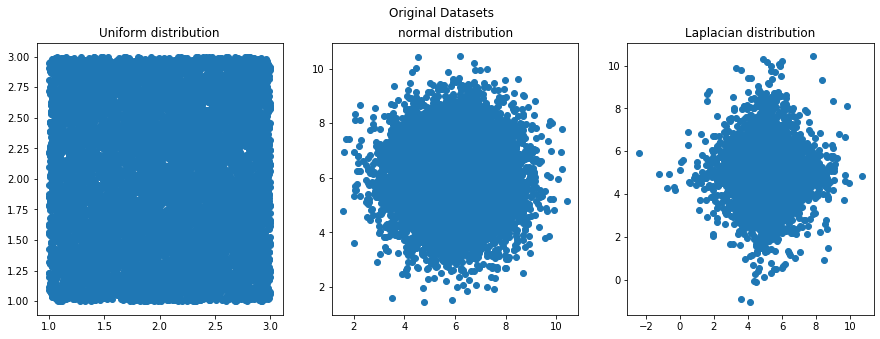

In [2]:
sources = scipy.io.loadmat('distrib.mat')
uniform = sources['uniform']
normal = sources['normal']
laplacian = sources['laplacian']
A = np.array([[4,3],[2,1]])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.sca(axes[0])
plt.scatter(uniform[0], uniform[1])
plt.title('Uniform distribution')

plt.sca(axes[1])
plt.scatter(normal[0], normal[1])
plt.title('normal distribution')

plt.sca(axes[2])
plt.scatter(laplacian[0], laplacian[1])
plt.title('Laplacian distribution')
plt.suptitle('Original Datasets')
plt.show()

**a**

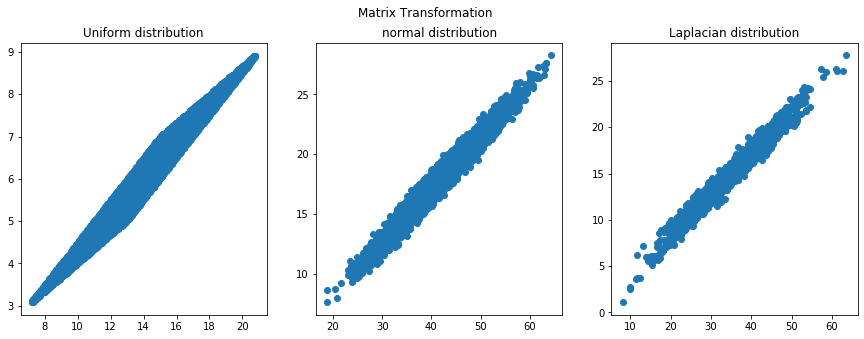

In [3]:
x_uniform = np.dot(A,uniform)
x_normal = np.dot(A,normal)
x_laplacian = np.dot(A,laplacian)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.sca(axes[0])
plt.scatter(x_uniform[0], x_uniform[1])
plt.title('Uniform distribution')

plt.sca(axes[1])
plt.scatter(x_normal[0], x_normal[1])
plt.title('normal distribution')

plt.sca(axes[2])
plt.scatter(x_laplacian[0], x_laplacian[1])
plt.title('Laplacian distribution')
plt.suptitle('Matrix Transformation')
plt.show()

**b**

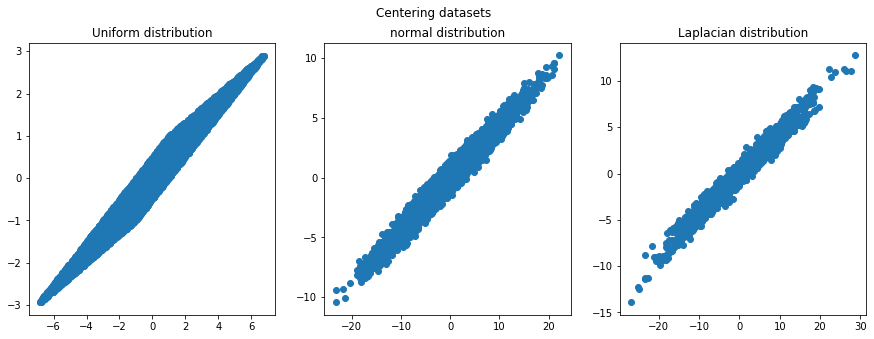

In [4]:
x_uniform -= np.mean(x_uniform, axis=1).reshape(2, 1)
x_normal -= np.mean(x_normal, axis=1).reshape(2, 1)
x_laplacian -= np.mean(x_laplacian, axis=1).reshape(2, 1)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.sca(axes[0])
plt.scatter(x_uniform[0], x_uniform[1])
plt.title('Uniform distribution')

plt.sca(axes[1])
plt.scatter(x_normal[0], x_normal[1])
plt.title('normal distribution')

plt.sca(axes[2])
plt.scatter(x_laplacian[0], x_laplacian[1])
plt.title('Laplacian distribution')
plt.suptitle('Centering datasets')
plt.show()

**c**

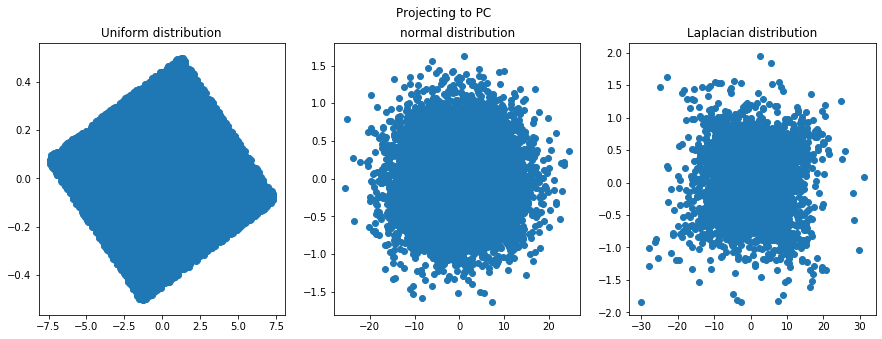

In [5]:
cov_uniform = np.cov(x_uniform)
eigvals_uniform, eigvecs_uniform = np.linalg.eig(cov_uniform)
pc_uniform = np.dot(eigvecs_uniform.T, x_uniform)

cov_normal = np.cov(x_normal)
eigvals_normal, eigvecs_normal = np.linalg.eig(cov_normal)
pc_normal = np.dot(eigvecs_normal.T, x_normal)

cov_laplacian = np.cov(x_laplacian)
eigvals_laplacian, eigvecs_laplacian = np.linalg.eig(cov_laplacian)
pc_laplacian = np.dot(eigvecs_laplacian.T, x_laplacian)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.sca(axes[0])
plt.scatter(pc_uniform[0], pc_uniform[1])
plt.title('Uniform distribution')

plt.sca(axes[1])
plt.scatter(pc_normal[0], pc_normal[1])
plt.title('normal distribution')

plt.sca(axes[2])
plt.scatter(pc_laplacian[0], pc_laplacian[1])
plt.title('Laplacian distribution')
plt.suptitle('Projecting to PC')
plt.show()

**d**

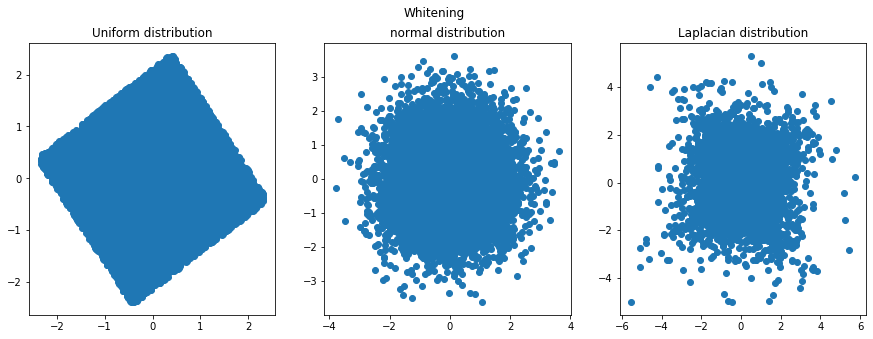

In [6]:
pc_uniform = pc_uniform / np.std(pc_uniform, axis=1).reshape(2, 1)
pc_normal = pc_normal / np.std(pc_normal, axis=1).reshape(2, 1)
pc_laplacian = pc_laplacian / np.std(pc_laplacian, axis=1).reshape(2, 1)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.sca(axes[0])
plt.scatter(pc_uniform[0], pc_uniform[1])
plt.title('Uniform distribution')

plt.sca(axes[1])
plt.scatter(pc_normal[0], pc_normal[1])
plt.title('normal distribution')

plt.sca(axes[2])
plt.scatter(pc_laplacian[0], pc_laplacian[1])
plt.title('Laplacian distribution')
plt.suptitle('Whitening')
plt.show()

**e**

In [7]:
thetas = np.pi*np.arange(0, 100, 1) / 50  # 0 to 2pi
kurtotis_uniform = np.zeros([2, 100])
kurtotis_normal = np.zeros([2, 100])
kurtotis_laplacian = np.zeros([2, 100])

# kurtosis for uniform distribution
for index, theta in enumerate(thetas):
    r_theta = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]])
    x_theta = np.dot(r_theta, pc_uniform)
    kurt = (np.sum(x_theta**4, axis=1).reshape(2,1) / pc_uniform.shape[1]) - 3
    kurtotis_uniform[:, index] = kurt.T

# kurtosis for normal distribution
for index, theta in enumerate(thetas):
    r_theta = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]])
    x_theta = np.dot(r_theta, pc_normal)
    kurt = (np.sum(x_theta**4, axis=1).reshape(2,1) / pc_normal.shape[1]) - 3
    kurtotis_normal[:, index] = kurt.T 
    
# kurtosis for laplacian distribution
for index, theta in enumerate(thetas):
    r_theta = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]])
    x_theta = np.dot(r_theta, pc_laplacian)
    kurt = (np.sum(x_theta**4, axis=1).reshape(2,1) / pc_laplacian.shape[1]) - 3
    kurtotis_laplacian[:, index] = kurt.T 

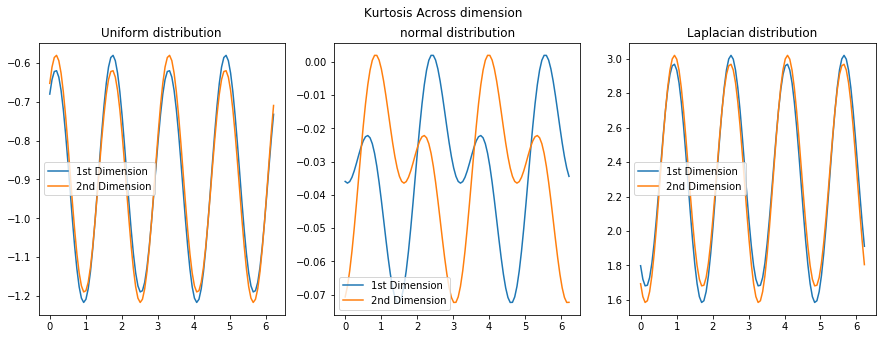

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.sca(axes[0])
plt.plot(thetas, kurtotis_uniform[0, :], label='1st Dimension')
plt.plot(thetas, kurtotis_uniform[1, :], label='2nd Dimension')
plt.title('Uniform distribution')
plt.legend()

plt.sca(axes[1])
plt.plot(thetas, kurtotis_normal[0, :], label='1st Dimension')
plt.plot(thetas, kurtotis_normal[1, :], label = '2nd Dimension')
plt.title('normal distribution')
plt.legend()

plt.sca(axes[2])
plt.plot(thetas, kurtotis_laplacian[0, :], label='1st Dimension')
plt.plot(thetas, kurtotis_laplacian[1, :], label = '2nd Dimension')
plt.title('Laplacian distribution')
plt.suptitle('Kurtosis Across dimension')
plt.legend()
plt.show()

**f**

In [9]:
# max and min for uniform distribution
kurtmax_uniform = np.max(kurtotis_uniform[0, :])
kurtmin_uniform = np.min(kurtotis_uniform[0, :])
thetamax_uniform = np.max(kurtotis_uniform[0, :])
thetamin_uniform = np.min(kurtotis_uniform[0, :])

# max and min for normal distribution
kurtmax_normal = np.max(kurtotis_normal[0, :])
kurtmin_normal = np.min(kurtotis_normal[0, :])
thetamax_normal = np.max(kurtotis_normal[0, :])
thetamin_normal = np.min(kurtotis_normal[0, :])

# max and min for laplacian distribution
kurtmax_laplacian = np.max(kurtotis_laplacian[0, :])
kurtmin_laplacian = np.min(kurtotis_laplacian[0, :])
thetamax_laplacian = np.max(kurtotis_laplacian[0, :])
thetamin_laplacian = np.min(kurtotis_laplacian[0, :])

In [10]:
print('Maximum and minimum kurtosis value for uniform distribution: {} and {}'.format(
    kurtmax_uniform, kurtmin_uniform))
print('Maximum and minimum kurtosis value for normal distribution: {} and {}'.format(
    kurtmax_normal, kurtmin_normal))
print('Maximum and minimum kurtosis value for normal distribution: {} and {}'.format(
    kurtmax_laplacian, kurtmin_laplacian))

Maximum and minimum kurtosis value for uniform distribution: -0.5807686784762969 and -1.2162049648845175
Maximum and minimum kurtosis value for normal distribution: 0.0019700330813083866 and -0.07231541765913718
Maximum and minimum kurtosis value for normal distribution: 3.019854485800515 and 1.5850201524615706
